# YOLO v8을 사용한 폐 질병 검사

In [2]:
import os
import random
import shutil
from tqdm.notebook import tqdm
import cv2
import glob

# Data 분할

In [4]:
train_data_root_path = '/Users/kimhongseok/cv_79_projects/part2/18-2/splited_data'

train_root = os.path.join(train_data_root_path, 'train')
valid_root = os.path.join(train_data_root_path, 'valid')
test_root = os.path.join(train_data_root_path, 'test')

cls_list = ['Bengin cases', 'Normal cases', 'Malignant cases']

for folder in [train_root, valid_root, test_root]:
    if not os.path.exists(folder):
        os.makedirs(folder)

    for cls in cls_list:
        cls_folder = os.path.join(folder, cls)
        if not os.path.exists(cls_folder):
            os.makedirs(cls_folder)

In [27]:
'''
random.seed(74)
data_root_path = '/Users/kimhongseok/cv_79_projects/part2/18-2/data'

for cls in cls_list:
    cls_path = os.path.join(data_root_path, cls)
    img_list = os.listdir(cls_path)
    random.shuffle(img_list)
    split_ratio = 0.1
    num_file = len(img_list)

    test_list = img_list[:int(num_file*split_ratio)]
    valid_list = img_list[int(num_file*split_ratio):int(num_file*split_ratio)*2]
    train_list = img_list[int(num_file*split_ratio)*2:]

    for img in test_list:
        shutil.copyfile(os.path.join(cls_path, img), os.path.join(os.path.join(test_root, cls), img))

    for img in valid_list:
        shutil.copyfile(os.path.join(cls_path, img), os.path.join(os.path.join(valid_root, cls), img))

    for img in train_list:
        shutil.copyfile(os.path.join(cls_path, img), os.path.join(os.path.join(train_root, cls), img))
'''

# data 확인

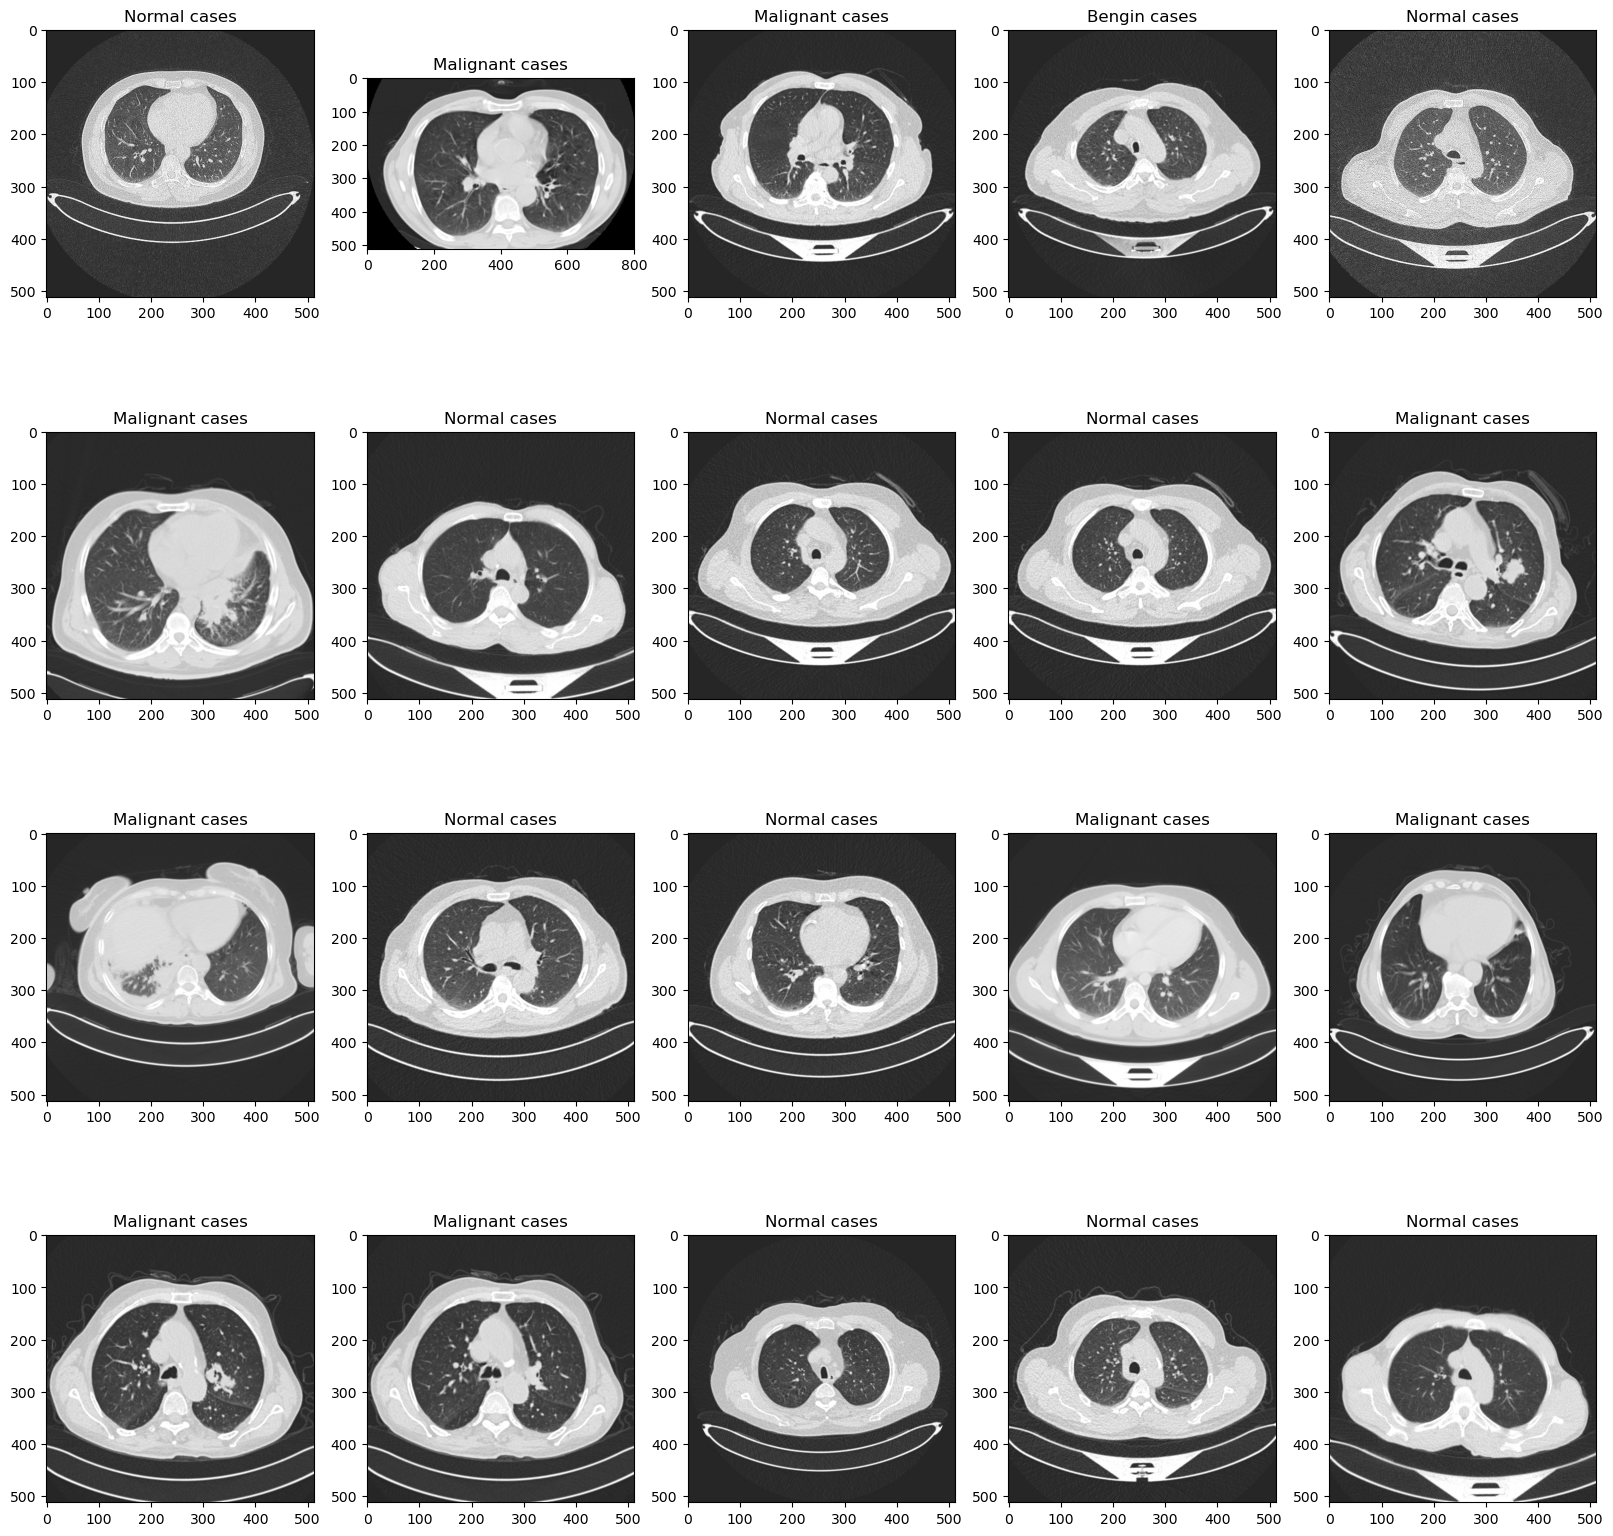

In [10]:
import matplotlib.pyplot as plt
import random
import glob
from PIL import Image

train_file_list = glob.glob(f'{train_root}/*/*')
random.shuffle(train_file_list)

plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(4, 5, i+1)
    img = Image.open(train_file_list[i]).convert('RGB')
    plt.imshow(img)
    plt.title(train_file_list[i].split('/')[-2])

# config file 생성

In [11]:
import yaml

pjt_root = '/Users/kimhongseok/cv_79_projects/part2/18-2'

data = dict()
data['train'] = train_root
data['valid'] = valid_root
data['test'] = test_root

data['nc'] = len(cls_list)
data['names'] = cls_list

with open(f'{pjt_root}/lung_cancer.yaml', 'w') as f:
    yaml.dump(data, f)

# Training

In [14]:
from ultralytics import YOLO

pjt_root = '/Users/kimhongseok/cv_79_projects/part2/18-2'
# 학습 결과가 저장될 경로로 이동
%cd /Users/kimhongseok/cv_79_projects/part2/18-2

/Users/kimhongseok/cv_79_projects/part2/18-2


In [15]:
# YOLO v8 호출 및 학습
model = YOLO('yolov8s-cls.pt') # YOLO v8 small classification pretrained
re = model.train(data='/Users/kimhongseok/cv_79_projects/part2/18-2/splited_data', epochs=1, batch=8, imgsz=256, name='train')

100%|██████████| 12.3M/12.3M [00:01<00:00, 7.04MB/s]
/opt/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /opt/anaconda3/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <9C467D80-5BAC-3156-B480-F0FF7E45DEF2> /opt/anaconda3/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


New https://pypi.org/project/ultralytics/8.2.87 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.66 🚀 Python-3.11.7 torch-2.4.0 CPU (Apple M1 Pro)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/Users/kimhongseok/cv_79_projects/part2/18-2/splited_data, epochs=1, time=None, patience=100, batch=8, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, 

/opt/anaconda3/lib/python3.11/site-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/train... 879 images, 0 corrupt: 100%|██████████| 879/879 [00:00<00:00, 3746.34it/s]

train: New cache created: /Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/train.cache



val: Scanning /Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/test... 109 images, 0 corrupt: 100%|██████████| 109/109 [00:00<00:00, 4849.27it/s]

val: New cache created: /Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs/classify/train
Starting training for 1 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]


                   all      0.853          1

1 epochs completed in 0.009 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train/weights/best.pt, 10.3MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.2.66 🚀 Python-3.11.7 torch-2.4.0 CPU (Apple M1 Pro)
YOLOv8s-cls summary (fused): 73 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/train... found 879 images in 3 classes ✅ 
val: None...
test: /Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/test... found 109 images in 3 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]


                   all      0.853          1
Speed: 0.0ms preprocess, 36.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


# Test
- 학습된 모델의 성능을 검증하기 위함 과정
- 일반화 성능을 확인하는 용도

In [16]:
pjt_root = '/Users/kimhongseok/cv_79_projects/part2/18-2'
result_fold = '/Users/kimhongseok/cv_79_projects/part2/18-2/runs/classify/train'

In [18]:
model = YOLO('/Users/kimhongseok/cv_79_projects/part2/18-2/runs/classify/train/weights/best.pt')
metrics = model.val(split='test')

Ultralytics YOLOv8.2.66 🚀 Python-3.11.7 torch-2.4.0 CPU (Apple M1 Pro)
YOLOv8s-cls summary (fused): 73 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
train: /Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/train... found 879 images in 3 classes ✅ 
val: None...
test: /Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/test... found 109 images in 3 classes ✅ 


test: Scanning /Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/test... 109 images, 0 corrupt: 100%|██████████| 109/109 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]


                   all      0.853          1
Speed: 0.0ms preprocess, 34.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val2


In [19]:
print(metrics)

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x17201ae10>
curves: []
curves_results: []
fitness: 0.9266054928302765
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.853210985660553, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9266054928302765}
save_dir: PosixPath('runs/classify/val2')
speed: {'preprocess': 0.0006015147637883458, 'inference': 34.84039787852436, 'loss': 4.8121181103067664e-05, 'postprocess': 6.343246599949828e-05}
task: 'classify'
top1: 0.853210985660553
top5: 1.0


In [20]:
print(metrics.top1)
print(metrics.top5)

0.853210985660553
1.0


# Inference
- 모델이 실전 환경에서 잘 작동하는지 확인하기 위해 예측을 수행하는 것
- 실제 데이터를 사용하여 잘 작동하는지 확인하는 용도
- 이미지를 하나씩 넣어 결과를 확인한다.

In [22]:
test_img_list = glob.glob('/Users/kimhongseok/cv_79_projects/part2/18-2/splited_data/test/*/*.jpg')
random.shuffle(test_img_list)


0: 256x256 Malignant cases 0.99, Normal cases 0.00, Bengin cases 0.00, 11.5ms
Speed: 0.0ms preprocess, 11.5ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 Malignant cases 1.00, Normal cases 0.00, Bengin cases 0.00, 10.4ms
Speed: 0.0ms preprocess, 10.4ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 Malignant cases 1.00, Normal cases 0.00, Bengin cases 0.00, 10.5ms
Speed: 0.0ms preprocess, 10.5ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 Normal cases 0.62, Bengin cases 0.23, Malignant cases 0.15, 12.7ms
Speed: 0.0ms preprocess, 12.7ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 Malignant cases 1.00, Normal cases 0.00, Bengin cases 0.00, 11.5ms
Speed: 0.0ms preprocess, 11.5ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 Malignant cases 0.97, Normal cases 0.02, Bengin cases 0.01, 11.3ms
Speed: 0.0ms preprocess, 11.3ms inference

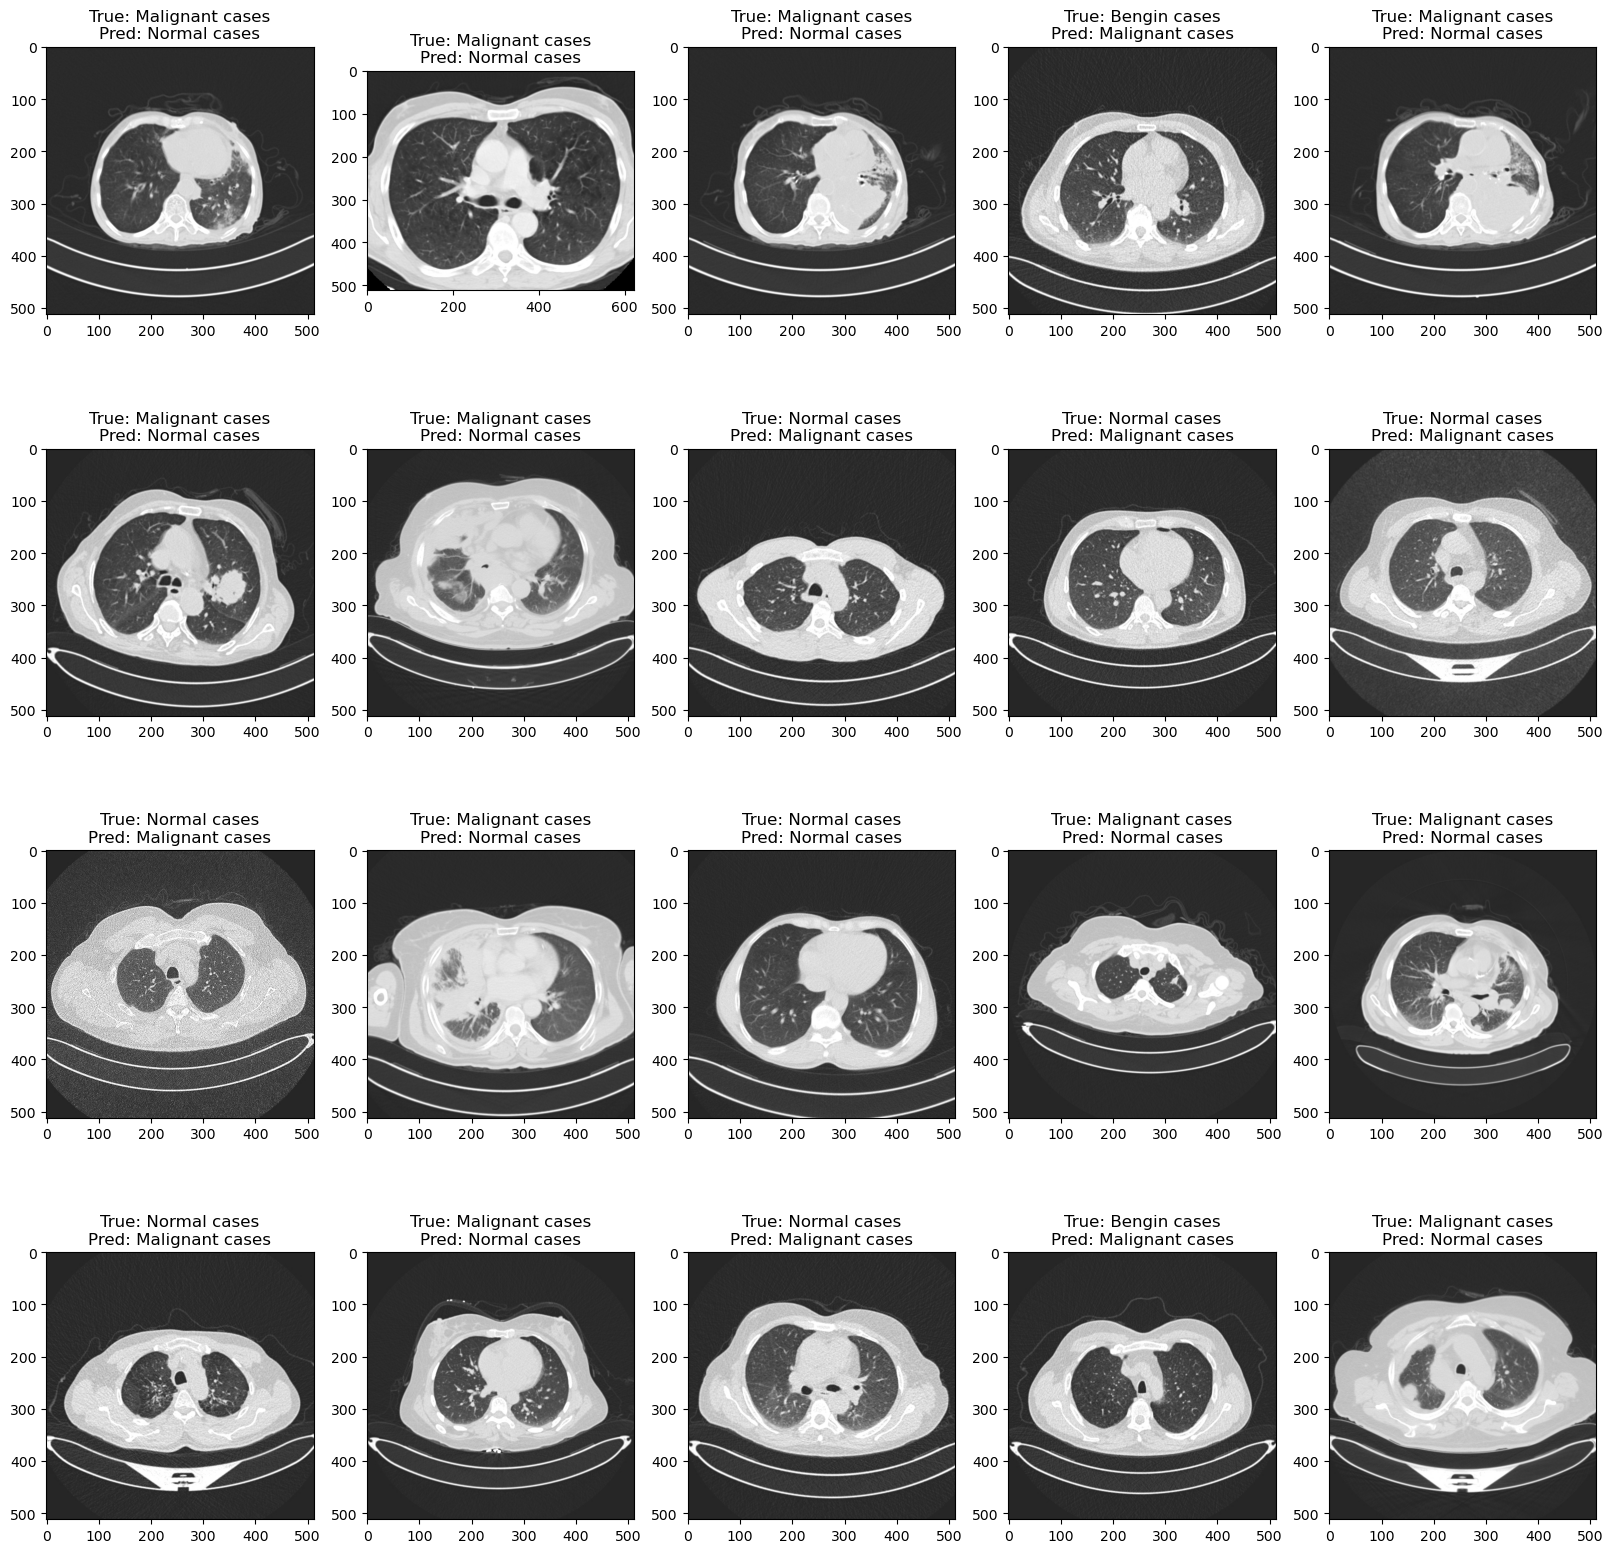

In [28]:
import torch
import torchvision.transforms as T

model = YOLO('/Users/kimhongseok/cv_79_projects/part2/18-2/runs/classify/train/weights/best.pt')
transforms = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor()
])

plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(4, 5, i+1)
    img = Image.open(test_img_list[i]).convert('RGB')
    img_src = transforms(img)
    x_tensor = img_src.unsqueeze(0)
    re = model(x_tensor)[0]

    plt.imshow(img)
    label = test_img_list[i].split('/')[-2]
    plt.title(f'True: {label}\nPred: {cls_list[torch.argmax(re.probs.data).item()]}')